# Coding SVM from scratch

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [8]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, n_classes=2, class_sep=1, random_state=52)

<Axes: >

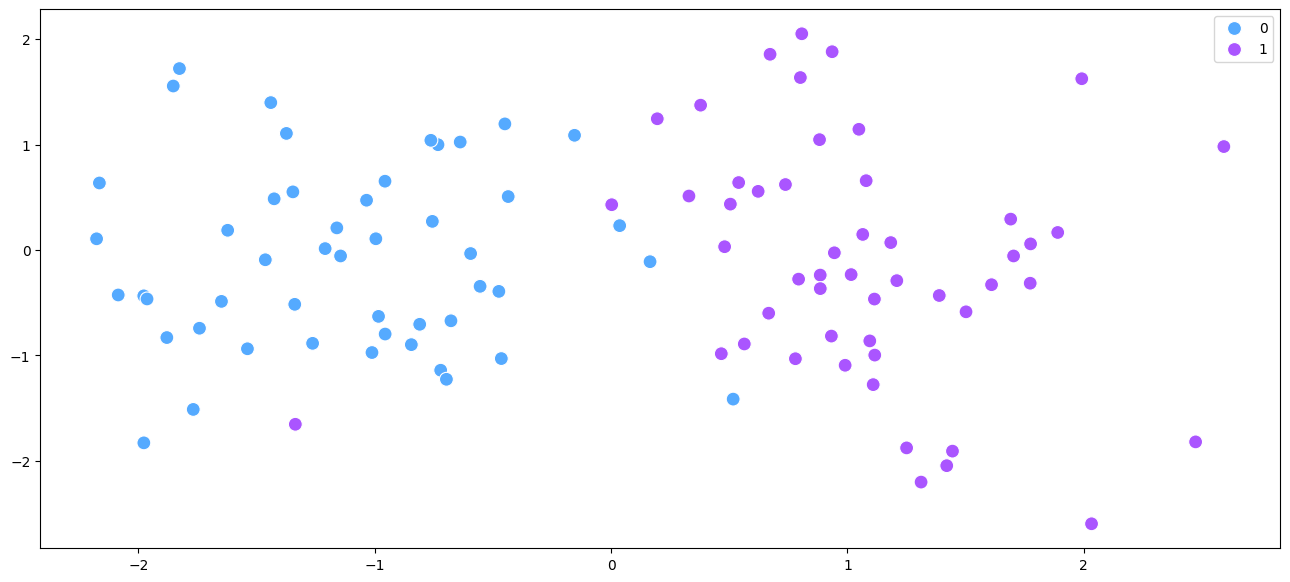

In [9]:
plt.figure(figsize=(16,7))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='cool', s=100)

In [ ]:
class our_SVM():
    def __init__(self, lr, epochs, lbd):
        self.lr = lr
        self.epochs = epochs
        self.lbd = lbd
        self.w = None
        self.b = None

    def fit(self, X, y):
        self.w  = np.ones(X.shape[1])
        self.b = 1

        y = np.where(y<=0, -1, 1)

        for i in range(self.epochs):
            j = np.random.randint(X.shape[0])
            condition= y[j]*(np.dot(X[j], self.w) - self.b) >= 1

            if (condition):
                dw = 2*self.lbd*self.w
                db = 0
            else:
                dw = 2*self.lbd*self.w - np.dot(X[j], y[j])
                db = y[j]
            
            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db

    def predict (self, X):
        pred = np.dot(X, self.w) - self.b
        pred = np.where(pred <= -1, 0, 1)
        return pred

In [50]:
our_svm = our_SVM(lr=0.01, epochs=1000, lbd=0.01)
our_svm.fit(X,y)

<Axes: >

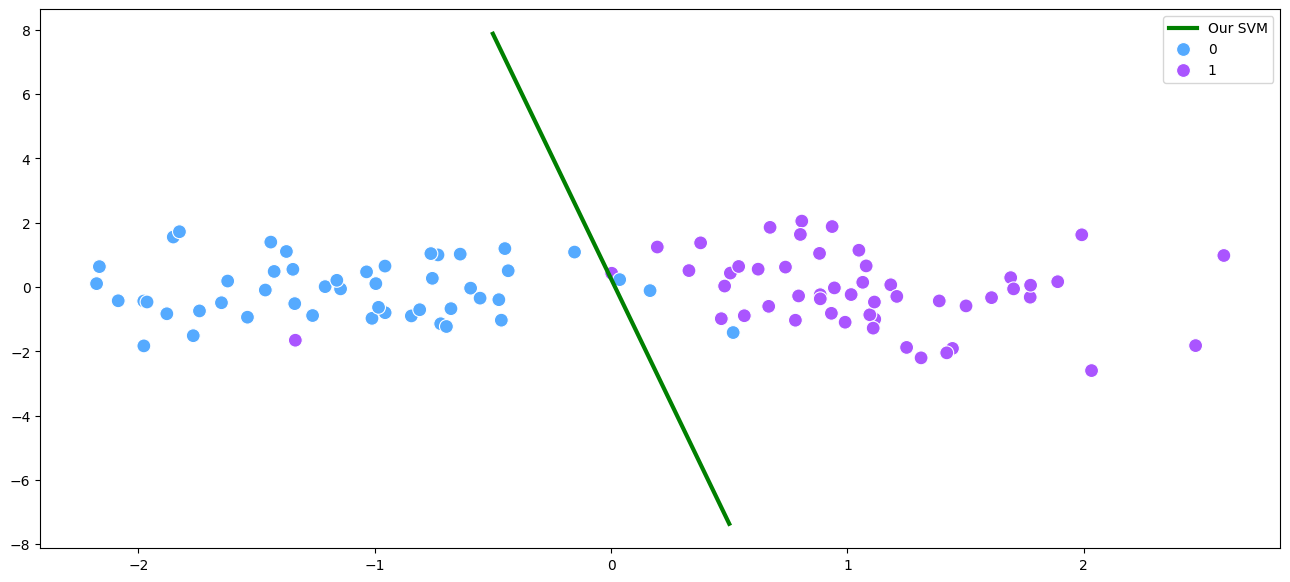

In [51]:
m = -(our_svm.w[0]/our_svm.w[1])
b = -(our_svm.b/our_svm.w[1])
x_input = np.linspace(-0.5,0.5,100)
y_input = m*x_input + b

plt.figure(figsize=(16,7))
plt.plot(x_input, y_input, color='green', linewidth=3, label='Our SVM')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='cool', s=100)

In [59]:
sklearn_SVM = SVC(C=0.1, max_iter=1000, kernel='linear')
sklearn_SVM.fit(X,y)

SVC(C=0.1, kernel='linear', max_iter=1000)

<Axes: >

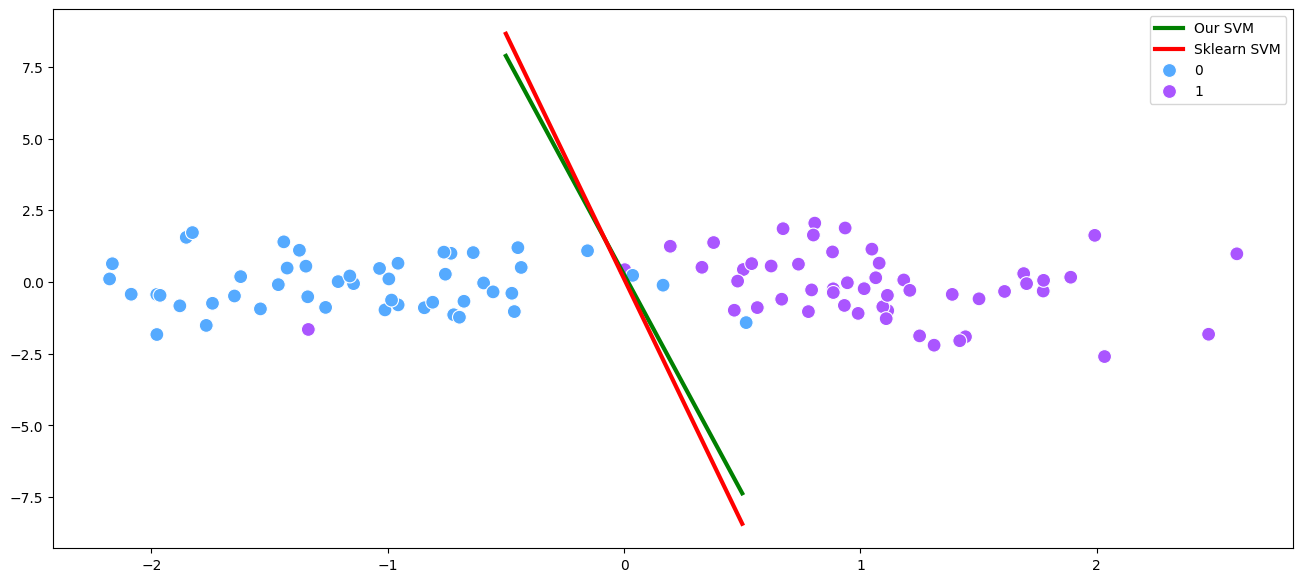

In [60]:
m = -(our_svm.w[0]/our_svm.w[1])
b = -(our_svm.b/our_svm.w[1])
x_input = np.linspace(-0.5,0.5,100)
y_input = m*x_input + b

m1 = -(sklearn_SVM.coef_[0][0]/sklearn_SVM.coef_[0][1])
b1 = -(sklearn_SVM.intercept_/sklearn_SVM.coef_[0][1])
x_input1 = np.linspace(-0.5,0.5,100)
y_input1 = m1*x_input1 + b1

plt.figure(figsize=(16,7))
plt.plot(x_input, y_input, color='green', linewidth=3, label='Our SVM')
plt.plot(x_input1, y_input1, color='red', linewidth=3, label='Sklearn SVM')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='cool', s=100)